In [1]:
# Run all the notebook when the time you come back later if you cancel
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext


In [2]:
spark = SparkSession.builder \
    .master("local") \
    .appName("churn_modellemesi") \
    .config("spark.executer.memory", "16gb") \
    .getOrCreate()

sc = spark.sparkContext
sc

<SparkContext master=local appName=churn_modellemesi>

In [3]:
#sc.stop()

In [4]:
spark_df = spark.read.csv("churn.csv",
                         header = True,
                         inferSchema = True,
                         sep = ",")
spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [5]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [6]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [7]:
#tum degiskenleri kucuk harfe cevirme ( kolaylık olması adına)
#pandas için; #df.columns = map(str.lower, df.columns)
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns])
spark_df

DataFrame[_c0: int, names: string, age: double, total_purchase: double, account_manager: int, years: double, num_sites: double, churn: int]

In [8]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [9]:
spark_df = spark_df.withColumnRenamed("_c0","index")
spark_df.show(2)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 2 rows



In [10]:
spark_df.count()

900

In [11]:
len(spark_df.columns) 
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [12]:
spark_df.distinct().count()

900

In [13]:
spark_df.select("names").distinct().count()

899

In [14]:
spark_df.groupby("names").count().sort("count", ascending = False).show(3)

+----------------+-----+
|           names|count|
+----------------+-----+
|   Jennifer Wood|    2|
|     John Barber|    1|
|Patrick Robinson|    1|
+----------------+-----+
only showing top 3 rows



In [15]:
#aynı kişi 2 kere var kontrol ediyorum.
spark_df.filter(spark_df.names == "Jennifer Wood").show()

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [16]:
#duplicateleri silme (kopyalı kişileri sildik)(MUTLAKA İNCELENMELİLER)
spark_df.select("names").dropDuplicates().groupBy("names").count().sort("count",ascending = False).show(5)

+----------------+-----+
|           names|count|
+----------------+-----+
|    Patrick Bell|    1|
|Patrick Robinson|    1|
|   Chelsea Marsh|    1|
|     John Barber|    1|
|     Amber Evans|    1|
+----------------+-----+
only showing top 5 rows



In [17]:
spark_df.where(spark_df.index == 439).select("names").show()

+-------------+
|        names|
+-------------+
|Jennifer Wood|
+-------------+



In [18]:
jen = spark_df.where(spark_df.index == 439).collect()[0]["names"]

In [19]:
jen.upper()

'JENNIFER WOOD'

## Keşifçi veri analizi

In [20]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [21]:
#görselleştirmek için bazı şeyleri almadım gerek yok diye mesela names
spark_df.select("age","total_purchase","account_manager","years","num_sites","churn",).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [22]:
spark_df.filter(spark_df.age > 47).count()

161

In [23]:
spark_df.groupby("churn").count().show()

+-----+-----+
|churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [24]:
spark_df.groupby("churn").agg({"total_purchase": "mean"}).show()
#toplam satın alma churn olma ve olmamayı etkilemiyor***********

+-----+-------------------+
|churn|avg(total_purchase)|
+-----+-------------------+
|    1| 10192.179933333337|
|    0| 10036.952853333332|
+-----+-------------------+



In [25]:
spark_df.groupby("churn").agg({"years": "mean"}).show()
#bu şekilde yorumlamalar yapılmalı

+-----+------------------+
|churn|        avg(years)|
+-----+------------------+
|    1|5.8835999999999995|
|    0|5.1510666666666625|
+-----+------------------+



In [26]:
#kor_data = spark_df.drop("index","names","churn").toPandas() CHURNU SİLDİM
#verilerde korelasyon oluşturma
kor_data = spark_df.drop("index","names",).toPandas()

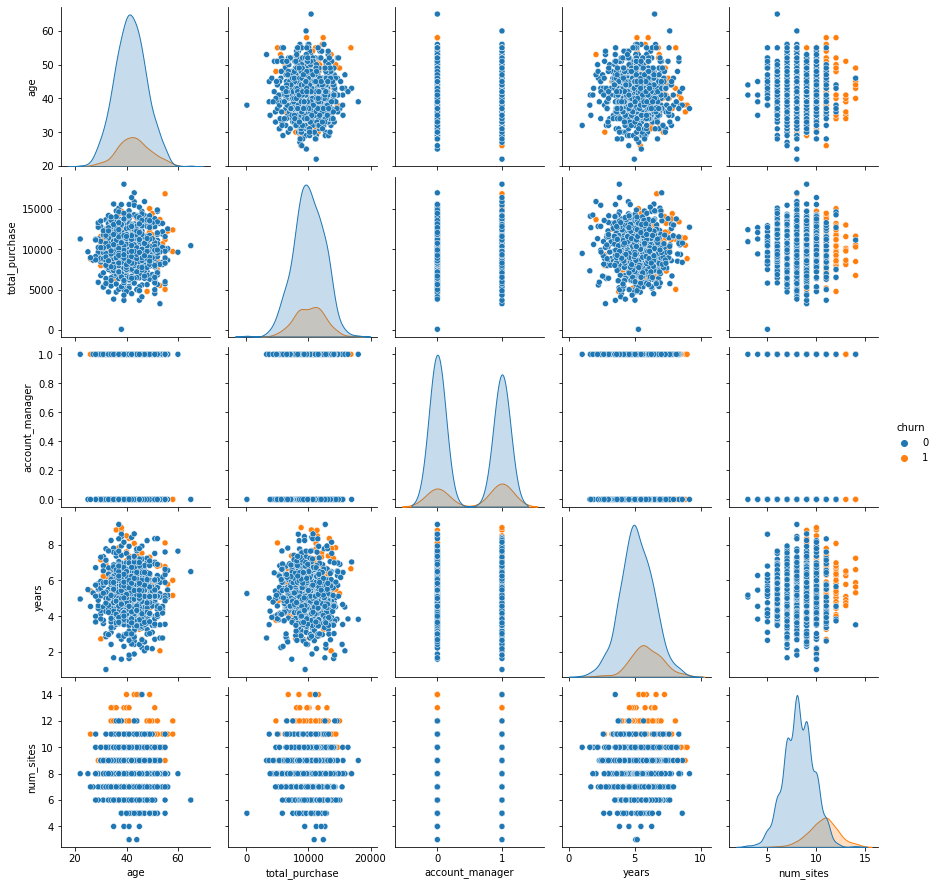

In [27]:
import seaborn as sns
sns.pairplot(kor_data,hue = "churn");

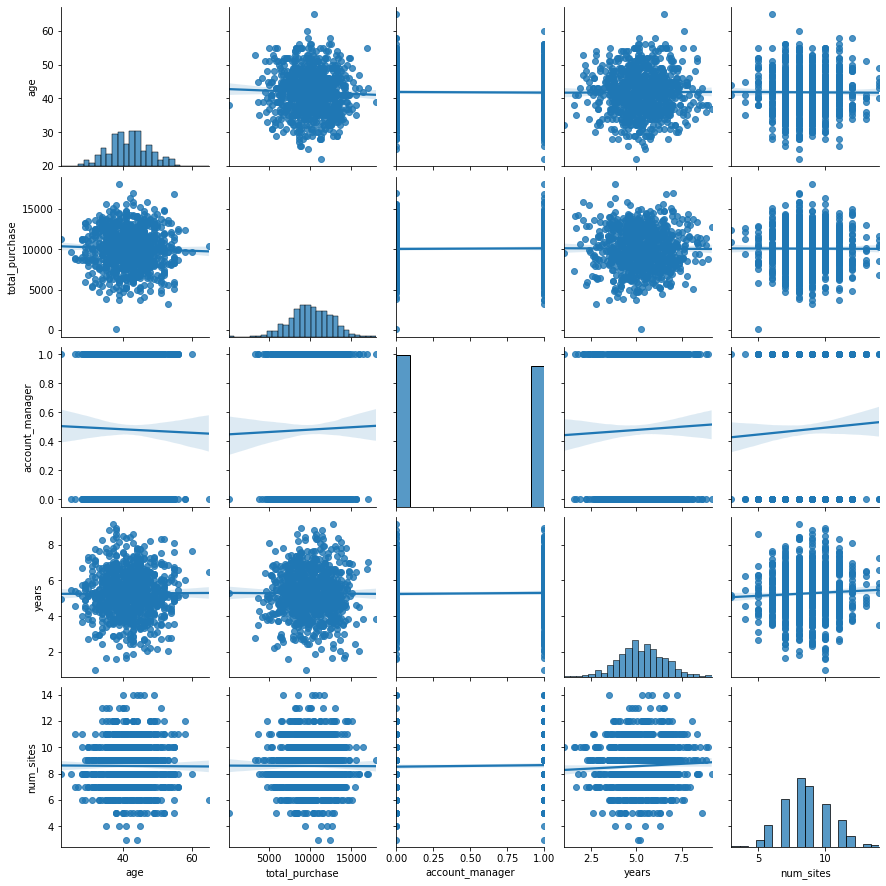

In [28]:
sns.pairplot(kor_data,
             vars = ["age","total_purchase","account_manager","years","num_sites"],
             #hue = "churn",
            kind="reg");

## Data Preprocessing

In [29]:
spark_df = spark_df.dropna()

In [30]:
spark_df = spark_df.withColumn("age_kare", spark_df.age**2)

In [31]:
spark_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
only showing top 3 rows



In [32]:
from pyspark.ml.feature import StringIndexer



In [33]:
stringIndexer = StringIndexer(inputCol= "churn", outputCol = "label")

In [34]:
?stringIndexer

Type:           StringIndexer
String form:    StringIndexer_d6d7e14fd443
File:           c:\users\enes\anaconda3\lib\site-packages\pyspark\ml\feature.py
Docstring:     
A label indexer that maps a string column of labels to an ML column of label indices.
If the input column is numeric, we cast it to string and index the string values.
The indices are in [0, numLabels). By default, this is ordered by label frequencies
so the most frequent label gets index 0. The ordering behavior is controlled by
setting :py:attr:`stringOrderType`. Its default value is 'frequencyDesc'.

.. versionadded:: 1.4.0

Examples
--------
>>> stringIndexer = StringIndexer(inputCol="label", outputCol="indexed",
...     stringOrderType="frequencyDesc")
>>> stringIndexer.setHandleInvalid("error")
StringIndexer...
>>> model = stringIndexer.fit(stringIndDf)
>>> model.setHandleInvalid("error")
StringIndexerModel...
>>> td = model.transform(stringIndDf)
>>> sorted(set([(i[0], i[1]) for i in td.select(td.id, td.indexed).

In [35]:
indexed = stringIndexer.fit(spark_df).transform(spark_df)

In [36]:
indexed.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'double')]

In [37]:
spark_df = indexed.withColumn("label", indexed["label"].cast("integer"))

In [38]:
spark_df.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'int')]

In [39]:
#bagimsiz değişkenlerin ayarlanması

In [40]:
from pyspark.ml.feature import VectorAssembler

In [41]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'age_kare',
 'label']

In [42]:
bag = ["age","total_purchase","account_manager","num_sites"]

In [43]:
vectorAssembler = VectorAssembler(inputCols= bag, outputCol = "features")

In [44]:
va_df = vectorAssembler.transform(spark_df)

In [45]:
final_df = va_df.select(["features","label"])

In [46]:
final_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
|[48.0,10356.02,0....|    1|
|[44.0,11331.58,1....|    1|
|[32.0,9885.12,1.0...|    1|
|[43.0,14062.6,1.0...|    1|
|[40.0,8066.94,1.0...|    1|
|[30.0,11575.37,1....|    1|
|[45.0,8771.02,1.0...|    1|
|[45.0,8988.67,1.0...|    1|
|[40.0,8283.32,1.0...|    1|
|[41.0,6569.87,1.0...|    1|
|[38.0,10494.82,1....|    1|
|[45.0,8213.41,1.0...|    1|
|[43.0,11226.88,0....|    1|
|[53.0,5515.09,0.0...|    1|
|[46.0,8046.4,1.0,...|    1|
+--------------------+-----+
only showing top 20 rows



## Test/ Train

In [47]:
splits = final_df.randomSplit([0.7,0.3])
train_df = splits[0]
test_df = splits[1]

In [48]:
train_df

DataFrame[features: vector, label: int]

In [49]:
test_df

DataFrame[features: vector, label: int]

## GBM ile Müşteri Terk Modellemesi

In [58]:
from pyspark.ml.classification import GBTClassifier

In [59]:
gbm = GBTClassifier(maxIter = 10, featuresCol = "features", labelCol = "label")

In [60]:
gbm_model = gbm.fit(train_df)

In [61]:
y_pred = gbm_model.transform(test_df)

In [62]:
y_pred

DataFrame[features: vector, label: int, rawPrediction: vector, probability: vector, prediction: double]

In [63]:
ac = y_pred.select("label","prediction")

In [64]:
ac.filter(ac.label == ac.prediction).count() / ac.count()  

0.8404669260700389

In [67]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator = BinaryClassificationEvaluator()

paramGrid = (ParamGridBuilder()
            .addGrid(gbm.maxDepth,[2,4,6])
            .addGrid(gbm.maxBins, [20,30])
            .addGrid(gbm.maxIter, [10,20])
            .build())
    
cv = CrossValidator(estimator=gbm, estimatorParamMaps=paramGrid,evaluator=evaluator, numFolds=10)    

In [69]:
cv_model = cv.fit(train_df)

In [ ]:
y_pred = cv_model.transform(test_df)
ac = y_pred.select("label","prediction")

In [ ]:
ac.filter(ac.label == ac.prediction).count() / ac.count()

In [ ]:
evaluator.evaluate(y_pred)

In [ ]:
## Bu müşteriler bizi terk eder mi 

In [ ]:
import pandas as pd
names = pd.Series(["Enes ŞİMŞEK", "İrem ŞENTÜRK", "Sıcak Hava","Kuzey TEKİNOĞLU","Ezel BAYRAKTAR"])
age = pd.Series([25,24,65,35,40])
total_purchase = pd.Series([32516, 58416,5021,33333,111111])
account_manager = pd.Series([1,0,0,1,1])
years = pd.Series([20,10,3,8,30])
num_sites = pd.Series([30,8,8,6,50])

yeni_musteriler = pd.DataFrame({
    'names':names,
    'age':age,
    'total_purchase':total_purchase,
    'account_manager':account_manager,
    'years':years,
    'num_sites':num_sites})

yeni_musteriler.columns

In [ ]:
yeni_musteriler

In [ ]:
yeni_sdf = spark.createDataFrame(yeni_musteriler)

In [ ]:
type(yeni_sdf)

In [ ]:
yeni_sdf.printSchema() 

In [ ]:
yeni_musteriler = vectorAssembler.transform(yeni_sdf)

In [ ]:
sonuclar = cv_model.transform(yeni_musteriler)

In [ ]:
sonuclar.select("names","prediction").printSchema()

In [ ]:
sonuclar.select("names","prediction").show()